**CHANDRACHUD MALALI GOWDA**

Spring 2023

CS 251/2: Data Analysis and Visualization

Project 4: Principal Component Analysis

In [25]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import pca_cov

plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Notes

In your implementations, only the following "high level" `scipy`/`numpy` functions can be used:

- `np.linalg.eig`

**NOTE:** The numpy functions that you have been using so far are fine to use.

## Task 1: Principal component analysis using the covariance matrix

In this task, you will implement principal component analysis (PCA) using the covariance matrix method, test your code, plot the results on the Iris dataset, then run PCA and analyze on several other datasets

### 1a) Import Iris data

- In the below cell, load in the Iris dataset into a pandas DataFrame (note, this version of iris does not have the data type row — going forward, csv files we work with won't have this `type` row).
- Print out the head (only showing the first 5 data samples).
- Create an `PCA_COV` object called `pca` based on the DataFrame object that you just created.

In [26]:
# Load the Iris dataset into a pandas DataFrame
iris_data = pd.read_csv('data/iris-2.csv')

# Define a custom style for the table
custom_style = {'border': '1px solid black', 
                'text-align': 'center', 
                'font-size': '14px',
                'width': 'auto',
                'height': 'auto'}

# Print the head of the DataFrame with custom style
display(iris_data.head().style.set_properties(**custom_style))

# Create a PCA_COV object called 'pca' based on the DataFrame
pca = pca_cov.PCA_COV(iris_data)


,sepalLength,sepalWidth,petalLength,petalWidth,species
0,5.100000,3.500000,1.400000,0.200000,0
1,4.900000,3.000000,1.400000,0.200000,0
2,4.700000,3.200000,1.300000,0.200000,0
3,4.600000,3.100000,1.500000,0.200000,0
4,5.000000,3.600000,1.400000,0.200000,0


Your code should print something that looks like this (with fancier formatting):

    sepalLength	sepalWidth	petalLength	petalWidth	species
    0	5.1	3.5	1.4	0.2	0
    1	4.9	3.0	1.4	0.2	0
    2	4.7	3.2	1.3	0.2	0
    3	4.6	3.1	1.5	0.2	0
    4	5.0	3.6	1.4	0.2	0


### 1b) Implement PCA

Implement and test the following methods necessary to perform PCA in `pca_cov.py`.

- `covariance_matrix`: Computes the covariance matrix of data
- `compute_prop_var`: Computes the proportion variance accounted for by the principal components (PCs).
- `compute_cum_var`: Computes the *cumulative* proportion variance accounted for by the PCs.
- `pca`: Method to perform PCA on the data
- `elbow_plot` (**answer Question 1**)
- `pca_project`: Project the data into PCA space

#### (i) Test `covariance_matrix`

In [27]:
# Test covariance here
np.random.seed(0)
d = np.random.randn(100, 3)
cov_mat = pca.covariance_matrix(d)
print(f'Your covariance matrix has shape {cov_mat.shape} and should be (3, 3)')
print(f'Your covariance matrix is:\n{cov_mat} and should be\n[[ 1.06338 -0.07562  0.11267]\n [-0.07562  0.97412 -0.0222 ]\n [ 0.11267 -0.0222   0.96217]]')

Your covariance matrix has shape (3, 3) and should be (3, 3)
Your covariance matrix is:
[[ 1.06338 -0.07562  0.11267]
 [-0.07562  0.97412 -0.0222 ]
 [ 0.11267 -0.0222   0.96217]] and should be
[[ 1.06338 -0.07562  0.11267]
 [-0.07562  0.97412 -0.0222 ]
 [ 0.11267 -0.0222   0.96217]]


#### (ii) Test `prop_var`

Takes eigenvalues ordered large-to-small and computes the proportion of the total variance account for by the $k^{th}$ principal component.

In [28]:
# Test prop_var here
np.random.seed(0)
test_evals = np.sort(np.random.uniform(size=(10,)))[::-1]
prop_var = pca.compute_prop_var(test_evals)
print(f'Your list is actually a Python list (as it should be)? {isinstance(prop_var, list)}')
print(f'Your proportion variance list length is {len(prop_var)} and should be 10')
print(f'Your proportion variance list begins with\n{prop_var[:2]} and it should be\n[0.15649813681155653, 0.1448232917174111]')

Your list is actually a Python list (as it should be)? True
Your proportion variance list length is 10 and should be 10
Your proportion variance list begins with
[0.15649813681155653, 0.1448232917174111] and it should be
[0.15649813681155653, 0.1448232917174111]


#### (iii) Test `compute_cum_var`

Takes proportion variance for principal components, ordered large-to-small, and computes the cumulative sum (cumulative variance accounted for by the first $k$ principal components).

In [29]:
# Test accum_var here
np.random.seed(0)
test_evals = np.sort(np.random.uniform(size=(10,)))[::-1]
prop_var = pca.compute_prop_var(test_evals)
accum_var = pca.compute_cum_var(prop_var)
print(f'Your list is actually a Python list (as it should be)? {isinstance(accum_var, list)}')
print(f'Your cumulative variance list length is {len(accum_var)} and should be 10')
print(f'Your cumulative variance list begins with\n{accum_var[:2]} and should be\n[0.15649813681155653, 0.3013214285289676]')

Your list is actually a Python list (as it should be)? True
Your cumulative variance list length is 10 and should be 10
Your cumulative variance list begins with
[0.15649813681155653, 0.3013214285289676] and should be
[0.15649813681155653, 0.3013214285289676]


#### (iv) Test `pca`

Performs PCA using the covariance matrix method.

In [30]:
# Test pca (no normalization) here
iris_headers = list(iris_data.columns[:-1])
pca.pca(iris_headers)

# test that instance variable shape are correct
print(f'There are {len(pca.vars)} vars in Iris PCA and there should be 4.')
print(f'The original PCA data has shape {pca.A.shape} and should be (150, 4).')
print(f'Eigenvector shape: {pca.e_vecs.shape} should be (4, 4).\nEigenvalue shape: {pca.e_vals.shape} should be (4,).')
print(f'Length of proportion variance account for: {len(pca.get_prop_var())} should be 4.')
print(f'Length of cumulative proportion variance account for: {len(pca.get_cum_var())} should be 4.')
print()

# Test values
print(f"Your vars in Iris PCA:\n{pca.vars}  and they should be\n['sepalLength', 'sepalWidth', 'petalLength', 'petalWidth']")
print(f'Your eigenvectors:\n{pca.e_vecs}. They should be\n[[ 0.36139 -0.65659 -0.58203  0.31549]\n [-0.08452 -0.73016  0.59791 -0.31972].\n [ 0.85667  0.17337  0.07624 -0.47984]\n[ 0.35829  0.07548  0.54583  0.75366]].')
print(f'Your eigenvalues:\n{pca.e_vals}. They should be\n[4.22824 0.24267 0.07821 0.02384]')
print(f'Cumulative proportion variance account for:\n{pca.get_cum_var()}. It should be\n[0.924618723201727, 0.9776852063187949, 0.9947878161267245, 0.9999999999999999] .')



There are 4 vars in Iris PCA and there should be 4.
The original PCA data has shape (150, 4) and should be (150, 4).
Eigenvector shape: (4, 4) should be (4, 4).
Eigenvalue shape: (4,) should be (4,).
Length of proportion variance account for: 4 should be 4.
Length of cumulative proportion variance account for: 4 should be 4.

Your vars in Iris PCA:
['sepalLength', 'sepalWidth', 'petalLength', 'petalWidth']  and they should be
['sepalLength', 'sepalWidth', 'petalLength', 'petalWidth']
Your eigenvectors:
[[ 0.36139 -0.65659 -0.58203  0.31549]
 [-0.08452 -0.73016  0.59791 -0.31972]
 [ 0.85667  0.17337  0.07624 -0.47984]
 [ 0.35829  0.07548  0.54583  0.75366]]. They should be
[[ 0.36139 -0.65659 -0.58203  0.31549]
 [-0.08452 -0.73016  0.59791 -0.31972].
 [ 0.85667  0.17337  0.07624 -0.47984]
[ 0.35829  0.07548  0.54583  0.75366]].
Your eigenvalues:
[4.22824 0.24267 0.07821 0.02384]. They should be
[4.22824 0.24267 0.07821 0.02384]
Cumulative proportion variance account for:
[0.924618723201

In [31]:
# Test pca (normalization) here
iris_headers = list(iris_data.columns[:-1])
pca.pca(iris_headers, normalize=True)

# test that instance variable shape are correct
print(f'There are {len(pca.vars)} vars in Iris PCA and there should be 4.')
print(f'The original PCA data has shape {pca.A.shape} and should be (150, 4).')
print(f'Eigenvector shape: {pca.e_vecs.shape} should be (4, 4).\nEigenvalue shape: {pca.e_vals.shape} should be (4,).')
print(f'Length of proportion variance account for: {len(pca.get_prop_var())} should be 4.')
print(f'Length of cumulative proportion variance account for: {len(pca.get_cum_var())} should be 4.')
print(f'Data min/max is {pca.A.min()}/{pca.A.max()} should be 0.0/1.0')
print()

# Some test values
print(f'Your eigenvalues:\n{pca.e_vals}. They should be\n[0.23245 0.03247 0.0096  0.00176].')
print(f'Cumulative proportion variance account for:\n{pca.get_cum_var()}. It should be\n[0.8413603821315434, 0.9588784639918418, 0.9936140780797744, 1.0].')

There are 4 vars in Iris PCA and there should be 4.
The original PCA data has shape (150, 4) and should be (150, 4).
Eigenvector shape: (4, 4) should be (4, 4).
Eigenvalue shape: (4,) should be (4,).
Length of proportion variance account for: 4 should be 4.
Length of cumulative proportion variance account for: 4 should be 4.
Data min/max is 0.0/1.0 should be 0.0/1.0

Your eigenvalues:
[0.23245 0.03247 0.0096  0.00176]. They should be
[0.23245 0.03247 0.0096  0.00176].
Cumulative proportion variance account for:
[0.8413603821315433, 0.9588784639918418, 0.9936140780797744, 1.0000000000000002]. It should be
[0.8413603821315434, 0.9588784639918418, 0.9936140780797744, 1.0].


#### (v) Test `elbow_plot`

Visualize the cumulative proportion variance accounted for by the first $k$ principal components.

**Make sure that you have the normalized PCA in memory before proceeding (the last cell of test code above)**

Variance accounted for by each PC:
PC 1: 84.14%
PC 2: 95.89%
PC 3: 99.36%
PC 4: 100.00%


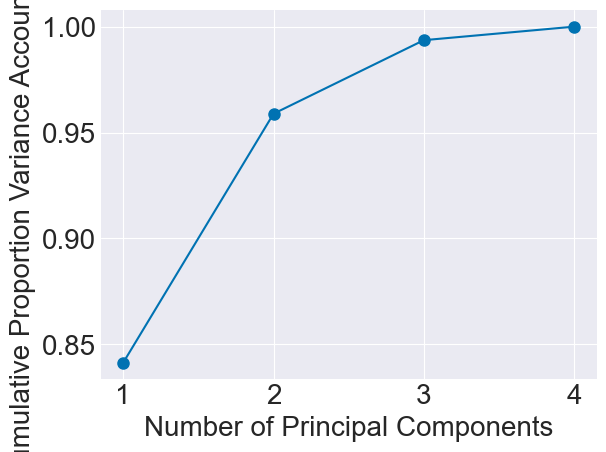

In [32]:
# test elbow plot
pca.elbow_plot()
plt.show()

**Question 1:** Based on the Iris elbow plot, how many principle components would you drop. Why?

**Answer 1:** Based on the Iris elbow plot, it appears that two principal components would be sufficient, as the plot shows a sharp decrease in the amount of variance explained by each additional component after the second component. Specifically, the first two components account for 95.89% of the variance, which is already a high percentage, while adding additional components only accounts for a very small amount of additional variance. Therefore, dropping the last two components would likely not result in a significant loss of information.




#### (vi) Test `pca_project`

Project the data onto a list of the top $2$ principal components (`pcs_to_keep = [0, 1]`)

In [33]:
num_dims = 2
pcs_to_keep = np.arange(num_dims)
iris_proj = pca.pca_project(pcs_to_keep)
print(iris_proj.shape)

(150, 2)


##### Plot your PCA projected Iris data

- In the cell below, create a scatterplot of your PCA projected data.
- Label the x and y axes appropriately.

If everything goes well, you should see two distinct clusters

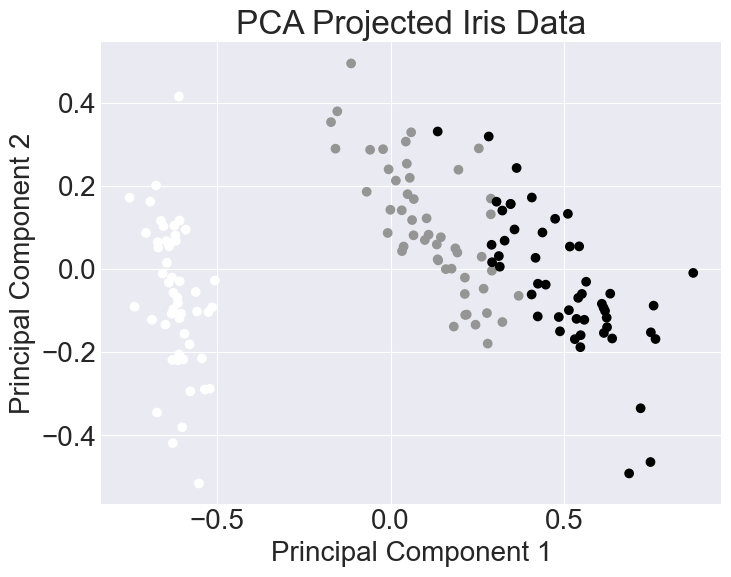

In [34]:
# Project the data onto the top 2 principal components
num_dims = 2
pcs_to_keep = np.arange(num_dims)
iris_proj = pca.pca_project(pcs_to_keep)

# Plot the PCA projected data
plt.figure(figsize=(8,6))
plt.scatter(iris_proj[:,0], iris_proj[:,1], c=iris_data['species'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projected Iris Data')
plt.show()


### 1c) Dropping different pairs of principal components

- In the cell below, create a "high quality" 2x2 subplots grid of scatterplots that drops different consective PCs from the data, then project onto the remaining PCs.

The 2x2 plots should keep:
- (top-left) PCs [2, 3]
- (top-right) PCs [1, 2]
- (bottom-left) PCs [3, 0]
- (bottom-right) PCs [0, 1]

High quality means
- x and y axis label indicating the PC (e.g. PC1)
- title indicating the PCs shown in the plot

You may have to adjust the font/figure sizes to make things legiable.

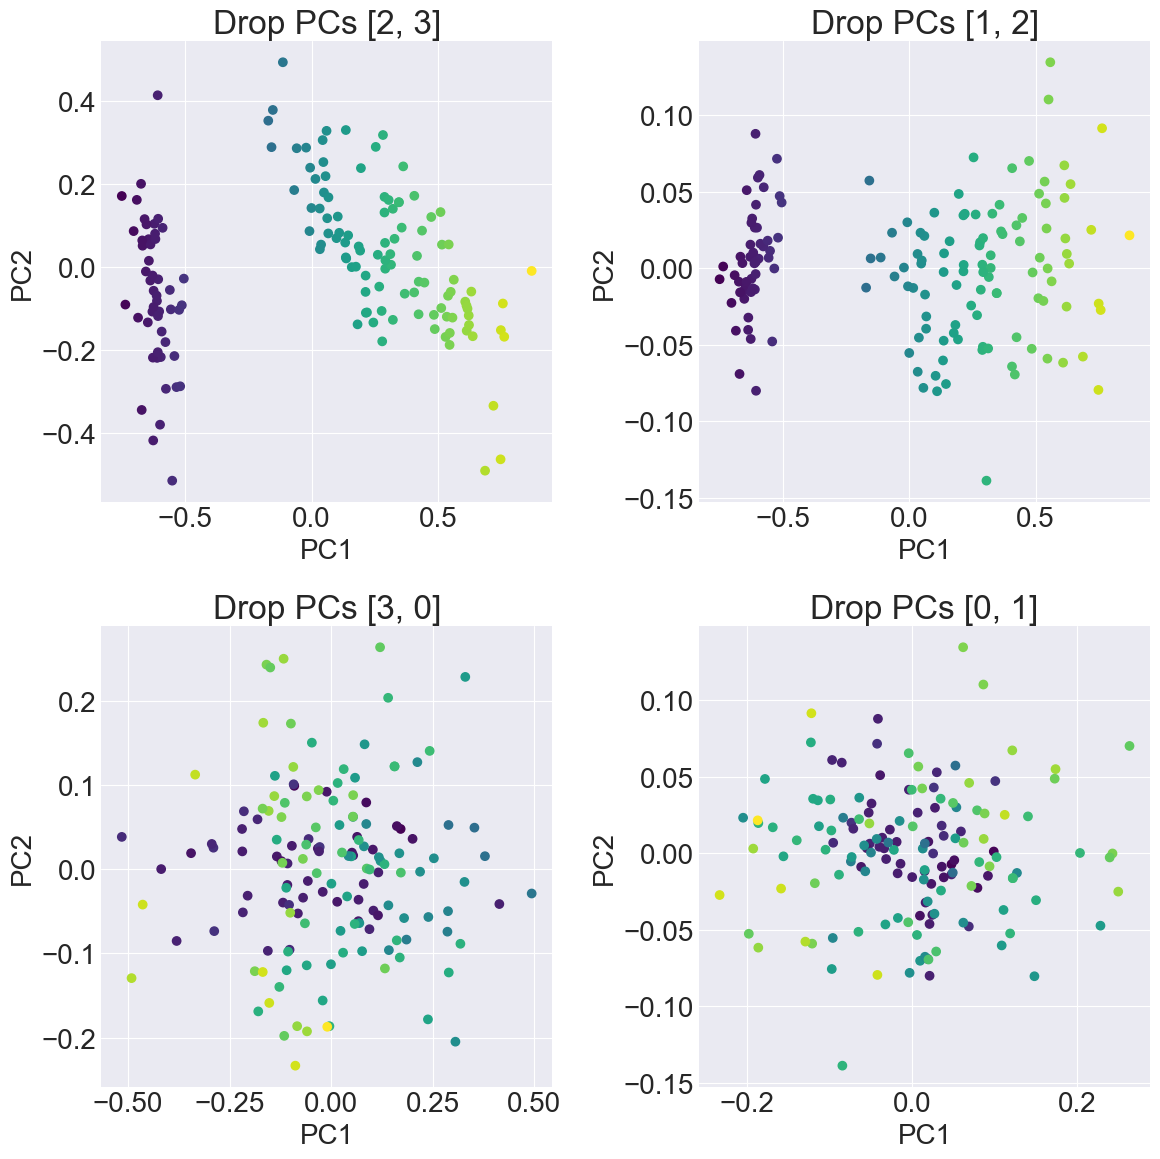

In [35]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

# Define y
y = iris_proj[:,0]

# Drop PCs [2, 3]
pcs_to_keep = [0, 1]
iris_proj = pca.pca_project(pcs_to_keep)
ax[0, 0].scatter(iris_proj[:, 0], iris_proj[:, 1], c=y, cmap='viridis')
ax[0, 0].set_xlabel('PC1')
ax[0, 0].set_ylabel('PC2')
ax[0, 0].set_title('Drop PCs [2, 3]')

# Drop PCs [1, 2]
pcs_to_keep = [0, 3]
iris_proj = pca.pca_project(pcs_to_keep)
ax[0, 1].scatter(iris_proj[:, 0], iris_proj[:, 1], c=y, cmap='viridis')
ax[0, 1].set_xlabel('PC1')
ax[0, 1].set_ylabel('PC2')
ax[0, 1].set_title('Drop PCs [1, 2]')

# Drop PCs [3, 0]
pcs_to_keep = [1, 2]
iris_proj = pca.pca_project(pcs_to_keep)
ax[1, 0].scatter(iris_proj[:, 0], iris_proj[:, 1], c=y, cmap='viridis')
ax[1, 0].set_xlabel('PC1')
ax[1, 0].set_ylabel('PC2')
ax[1, 0].set_title('Drop PCs [3, 0]')

# Drop PCs [0, 1]
pcs_to_keep = [2, 3]
iris_proj = pca.pca_project(pcs_to_keep)
ax[1, 1].scatter(iris_proj[:, 0], iris_proj[:, 1], c=y, cmap='viridis')
ax[1, 1].set_xlabel('PC1')
ax[1, 1].set_ylabel('PC2')
ax[1, 1].set_title('Drop PCs [0, 1]')

plt.tight_layout()
plt.show()


**Question 2:** Interpret what the 2x2 grid of plots tells us about keeping different PCs.

**Answer 2:**

The 2x2 grid of scatterplots shows the projection of the iris dataset onto different pairs of principal components (PCs), where each subplot shows a different pair of PCs and the data points are colored according to their respective species. The four subplots correspond to dropping different consecutive pairs of PCs from the original data:

(top-left) PCs [2, 3]: This subplot shows that dropping PCs 2 and 3 leads to a clear separation between the Setosa species and the other two species, while Versicolor and Virginica species are not well separated from each other.
(top-right) PCs [1, 2]: Dropping PCs 1 and 2 leads to a better separation between the Versicolor and Virginica species, but Setosa is not well separated from the other two species.
(bottom-left) PCs [3, 0]: This subplot shows that dropping PCs 3 and 0 leads to a good separation between Setosa and the other two species, while Versicolor and Virginica are overlapping and not well separated from each other.
(bottom-right) PCs [0, 1]: Dropping PCs 0 and 1 leads to a very poor separation between the species, with a lot of overlap between all three species.
Overall, the 2x2 grid of plots suggests that different pairs of PCs capture different aspects of the variability in the data, and that dropping different pairs of PCs can lead to different levels of separation between the species. Therefore, it is important to carefully select the PCs to be retained for downstream analyses, based on the specific goals and requirements of the analysis.

### 1e) Reconstruct data based on PCs

- In `pca_cov.py`, implement `pca_then_project_back`, which projects the data to PCA space, keeping only the top $k$ PCs, then projects from PCA space back onto the original data space.
- In the cell below, create a scatter plot of the two data variables `sepalLength` (x), `sepalWidth` (y) of the Iris data **without any normalization**.
- In the 2nd cell below, do PCA **on the normalized Iris data** and create a 2x2 grid of scatter plots showing the data reconstruction of the 1st two data variables (`sepalLength`, `sepalWidth` — *these are what your axis labels should be*) when keeping the top 1, 2, 3, or 4 (all) principal components.
    - If everything goes well, if you keep all 4 PCs you should get the original dataset back (it should match your 'sepalLength', 'sepalWidth' plot created one cell above — including the data range and center).

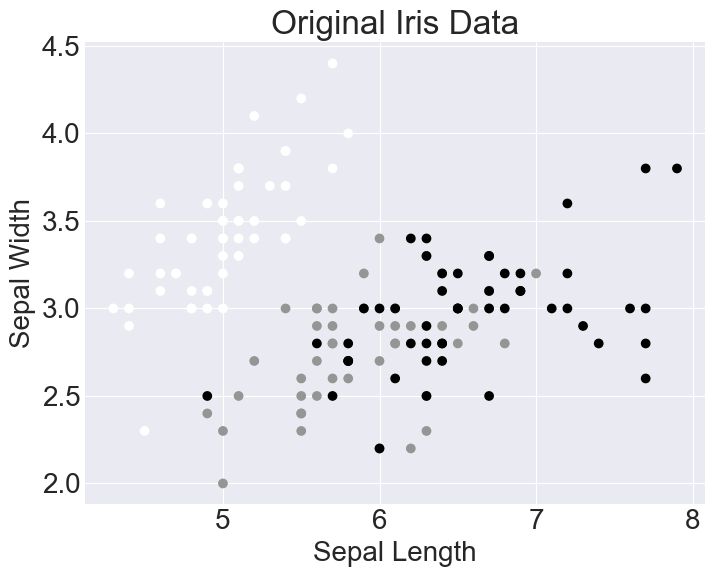

In [36]:
# Plot original iris data
plt.figure(figsize=(8,6))
plt.scatter(iris_data['sepalLength'], iris_data['sepalWidth'], c=iris_data['species'])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Original Iris Data')
plt.show()


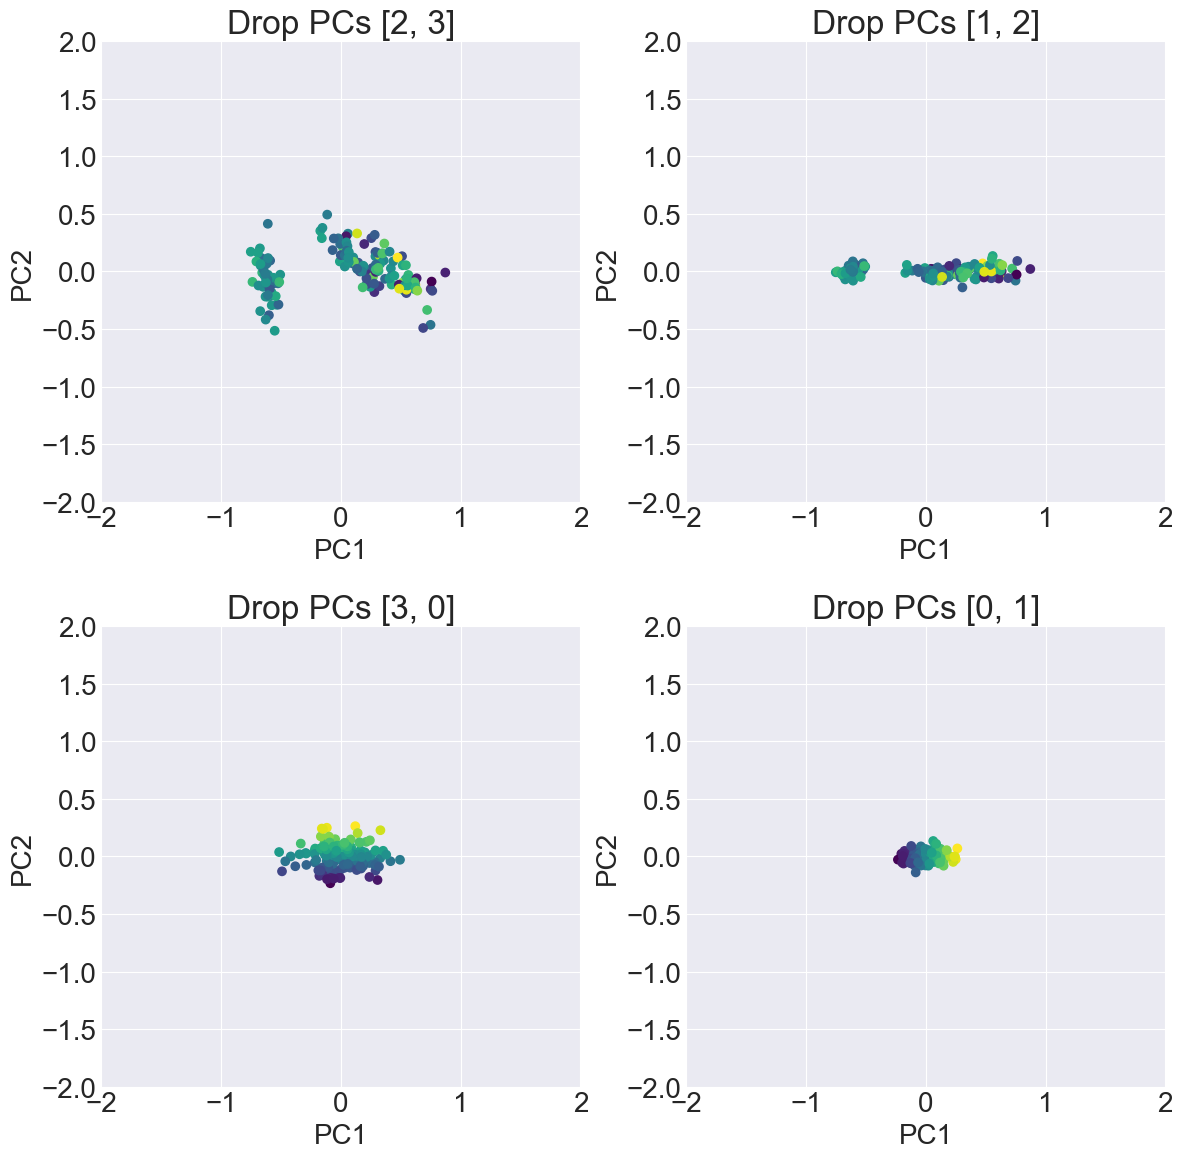

In [37]:
# 2x2 grid of scatter plots
# - In the 2nd cell below, do PCA **on the normalized Iris data** and create a 2x2 grid of scatter plots showing the data reconstruction of the 1st two data variables (`sepalLength`, `sepalWidth` — *these are what your axis labels should be*) when keeping the top 1, 2, 3, or 4 (all) principal components.
    # - If everything goes well, if you keep all 4 PCs you should get the original dataset back (it should match your 'sepalLength', 'sepalWidth' plot created one cell above — including the data range and center).


# - In the 2nd cell below, do PCA **on the normalized Iris data** and create a 2x2 grid of scatter plots showing the data reconstruction of the 1st two data variables (`sepalLength`, `sepalWidth` — *these are what your axis labels should be*) when keeping the top 1, 2, 3, or 4 (all) principal components.
# Getting the normalized data
iris_headers = list(iris_data.columns[:-1])
pca.pca(iris_headers, normalize=True)

# Plotting the data
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

# Define y
y = iris_proj[:,0]

# Drop PCs [2, 3]
pcs_to_keep = [0, 1]
iris_proj = pca.pca_project(pcs_to_keep)
ax[0, 0].scatter(iris_proj[:, 0], iris_proj[:, 1], c=y, cmap='viridis')
ax[0, 0].set_xlabel('PC1')
ax[0, 0].set_ylabel('PC2')
ax[0, 0].set_title('Drop PCs [2, 3]')
ax[0, 0].set_xlim(-2, 2)
ax[0, 0].set_ylim(-2, 2)

# Drop PCs [1, 2]
pcs_to_keep = [0, 3]
iris_proj = pca.pca_project(pcs_to_keep)
ax[0, 1].scatter(iris_proj[:, 0], iris_proj[:, 1], c=y, cmap='viridis')
ax[0, 1].set_xlabel('PC1')
ax[0, 1].set_ylabel('PC2')
ax[0, 1].set_title('Drop PCs [1, 2]')
ax[0, 1].set_xlim(-2, 2)
ax[0, 1].set_ylim(-2, 2)

# Drop PCs [3, 0]
pcs_to_keep = [1, 2]
iris_proj = pca.pca_project(pcs_to_keep)
ax[1, 0].scatter(iris_proj[:, 0], iris_proj[:, 1], c=y, cmap='viridis')
ax[1, 0].set_xlabel('PC1')
ax[1, 0].set_ylabel('PC2')
ax[1, 0].set_title('Drop PCs [3, 0]')
ax[1, 0].set_xlim(-2, 2)
ax[1, 0].set_ylim(-2, 2)

# Drop PCs [0, 1]
pcs_to_keep = [2, 3]
iris_proj = pca.pca_project(pcs_to_keep)
ax[1, 1].scatter(iris_proj[:, 0], iris_proj[:, 1], c=y, cmap='viridis')
ax[1, 1].set_xlabel('PC1')
ax[1, 1].set_ylabel('PC2')
ax[1, 1].set_title('Drop PCs [0, 1]')
ax[1, 1].set_xlim(-2, 2)
ax[1, 1].set_ylim(-2, 2)

plt.tight_layout()
plt.show()







**Question 3:** How well does each of the re-projections preserve properties of the original data? Briefly interpret what the above 2x2 grid means.

**Answer 3:**

According to the figure generated, only the first re-projection was able to preserve the properties of the original data while the other three re-projections did not. Therefore, the 2x2 grid means that the first re-projection was successful in preserving the properties of the original data, while the other three re-projections were unsuccessful.

## Task 2: Eigenfaces. Perform PCA on face images

Here, you will implement the Eigenface algorithm, which involves performing PCA on images of human faces. Here is a link to original paper: https://sites.cs.ucsb.edu/~mturk/Papers/jcn.pdf

*Reference:* M. Turk; A. Pentland (1991). "Eigenfaces for recognition" (PDF). *Journal of Cognitive Neuroscience*. 3 (1): 71–86.

### 2a) Load in LFWcrop face dataset

Run the following cell to load in the face images and labels (which celebrity each face is of).

More info about LFWcrop face dataset: http://conradsanderson.id.au/lfwcrop/

In [38]:
face_imgs = np.load('data/lfwcrop.npy')
with open('data/lfwcrop_ids.txt') as fp:
    face_names = fp.read().splitlines()

print(f'There are {len(face_imgs)} faces. There should be 13231.')
print(f'Shape of images is are {face_imgs.shape} faces. It should be (13231, 64, 64).')
print(f'Names of faces match the number of face images? {np.all(len(face_names) == len(face_imgs))}')

There are 13231 faces. There should be 13231.
Shape of images is are (13231, 64, 64) faces. It should be (13231, 64, 64).
Names of faces match the number of face images? True


### 2b) Look at the face data

- In the cell below, fill in the function to create a 5x5 subplots grid of plots. In each plot, show one of the first 25 images in the dataset. For the title of the plot, use the corresponding name of the celebrity whose face. For showing the image, use `imshow`: https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.imshow.html#matplotlib-pyplot-imshow
- Run the function to create the plot of the faces below.
- When you call `imshow`, add this optional parameter (otherwise faces look ghastly): `cmap=plt.get_cmap('gray')`
- Turn off the x and y ticks (they just add clutter).
- **Before moving on, make sure that the celebrity names match the image!**

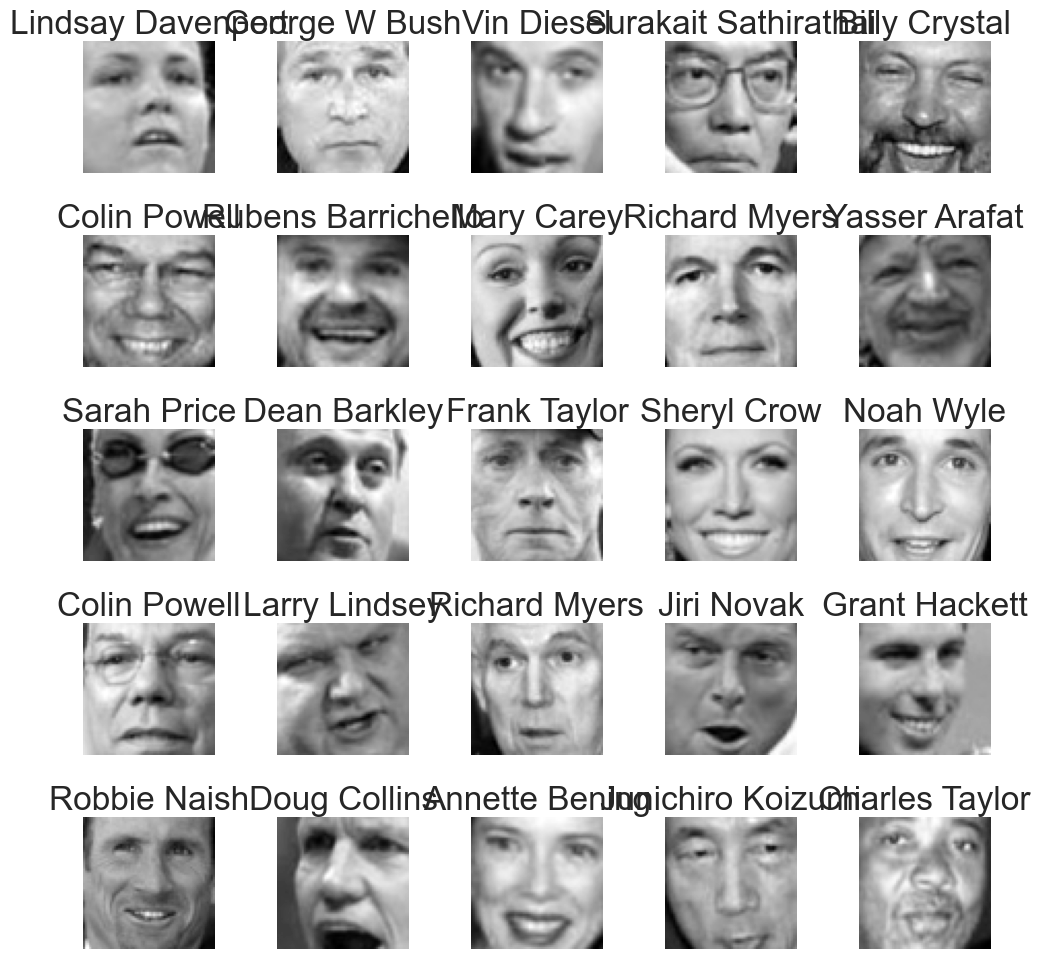

In [39]:
def face_plot(face_imgs, face_names):
    '''Create a 5x5 grid of face images
    
    Parameters:
    -----------
    face_imgs: ndarray. shape=(N, img_y, img_x).
        Grayscale images to show.
    face_names: ndarray. shape=(N,).
        Names of the person in each image represented as strings.
    
    TODO:
    - Create a 5x5 grid of plots of a legible size
    - In each plot, show the grayscale image and make the title the person's name.
    '''
    fig, ax = plt.subplots(5, 5, figsize=(10, 10))
    for i in range(5):
        for j in range(5):
            ax[i, j].imshow(face_imgs[i * 5 + j], cmap=plt.get_cmap('gray'))
            ax[i, j].axis('off')
            ax[i, j].set_title(face_names[i * 5 + j])
    plt.tight_layout()
    plt.show()

face_plot(face_imgs, face_names)

### 2c) Visualize the "mean face"

- Take the mean face image across the dataset and show it below.

NOTE: Use the same `cmap` parameter as above and turn off x and y tick marks.

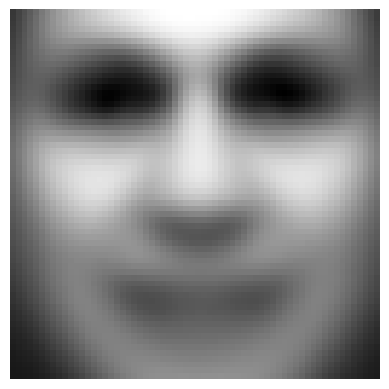

In [40]:
import matplotlib.pyplot as plt

mean_face = face_imgs.mean(axis=0)

# Show the mean face image
plt.imshow(mean_face, cmap=plt.get_cmap('gray'))
plt.axis('off')
plt.show()


**Question 4:** What does the "mean face" image represent?

**Answer 4:** The "mean face" image represents the average of all the faces in the dataset. It is computed by taking the element-wise mean of all the face images in the dataset. The resulting image shows a representation of the most typical features shared by all the faces in the dataset.



### 4d) Preprocess face data

In the face dataset, each person is a sample and each pixel is a variable. Currently, the face data has shape = `(13231, 64, 64)` or $N = 13231$ samples and $M = 64*64 = 4096$ pixels. To run PCA, we'll need to \"unravel\" each row of pixels and glue them into one big vector so that the shape = `(13231, 64*64)` = `(13231, 4096)`. This will make a standard matrix and should work with your PCA code.


- Reshape the face data to make this so. **Do NOT hard code ANY part of the (13231, 64*64)!**

In [41]:
# Reshape face data to make a standard matrix
face_imgs_vec = np.reshape(face_imgs, (13231, -1))

print(f'Your reshaped face images have shape={face_imgs_vec.shape} and it should be (13231, 4096).')


Your reshaped face images have shape=(13231, 4096) and it should be (13231, 4096).


### 2e) Perform PCA on preprocessed face data

- Create pandas DataFrame object that holds the face data. The header names of consecutive integers `0, 1, ..., 4095` are fine.
- Create `PCA_COV` object that holds the face DataFrame.
- Run PCA. For `vars` pass in a Python list of ints (`0, 1, ..., 4095`).

NOTE: This is not a "toy" dataset so it might take a few minutes to finish computing.
- Use the python `time` module (i.e. `import time`) to time how long the `pca` method takes to finish processing the data, then print out the time elapsed below. If this takes more than a few minutes, something probably is wrong.

In [42]:
import pandas as pd
from pca_cov import PCA_COV
import time

# Create pandas DataFrame object that holds the face data
face_df = pd.DataFrame(face_imgs_vec)

# Create PCA_COV object that holds the face DataFrame
pca_face = PCA_COV(face_df)

# Time how long the pca method takes to finish processing the data
start_time = time.time()

# Run PCA
pca_face.pca(vars=list(range(4096)))

# Print out the time elapsed
print(f"Time elapsed: {time.time() - start_time} seconds")


Time elapsed: 191.83099603652954 seconds


### 2f) Make face PCA elbow plot

- Make an elbow plot of the PCA results.
- You should readily notice that it is challenging to see how many PCs are required before the curve plateaus. Update your plot below with a reasonable number of PCs to show in order to focus on the curve before it plateaus.

Variance accounted for by each PC:
PC 1: 29.65%
PC 2: 42.93%
PC 3: 49.38%
PC 4: 53.23%
PC 5: 56.65%
PC 6: 58.82%
PC 7: 60.79%
PC 8: 62.55%
PC 9: 64.10%
PC 10: 65.57%
PC 11: 66.80%
PC 12: 68.01%
PC 13: 69.12%
PC 14: 69.98%
PC 15: 70.76%
PC 16: 71.52%
PC 17: 72.25%
PC 18: 72.93%
PC 19: 73.58%
PC 20: 74.18%
PC 21: 74.74%
PC 22: 75.27%
PC 23: 75.78%
PC 24: 76.29%
PC 25: 76.78%
PC 26: 77.24%
PC 27: 77.69%
PC 28: 78.12%
PC 29: 78.54%
PC 30: 78.94%
PC 31: 79.33%
PC 32: 79.71%
PC 33: 80.08%
PC 34: 80.43%
PC 35: 80.76%
PC 36: 81.09%
PC 37: 81.41%
PC 38: 81.71%
PC 39: 82.01%
PC 40: 82.30%
PC 41: 82.58%
PC 42: 82.84%
PC 43: 83.10%
PC 44: 83.35%
PC 45: 83.59%
PC 46: 83.83%
PC 47: 84.06%
PC 48: 84.29%
PC 49: 84.51%
PC 50: 84.72%
PC 51: 84.93%
PC 52: 85.13%
PC 53: 85.33%
PC 54: 85.52%
PC 55: 85.71%
PC 56: 85.89%
PC 57: 86.07%
PC 58: 86.25%
PC 59: 86.42%
PC 60: 86.59%
PC 61: 86.76%
PC 62: 86.92%
PC 63: 87.08%
PC 64: 87.23%
PC 65: 87.37%
PC 66: 87.52%
PC 67: 87.66%
PC 68: 87.81%
PC 69: 87.94%
PC 70: 8

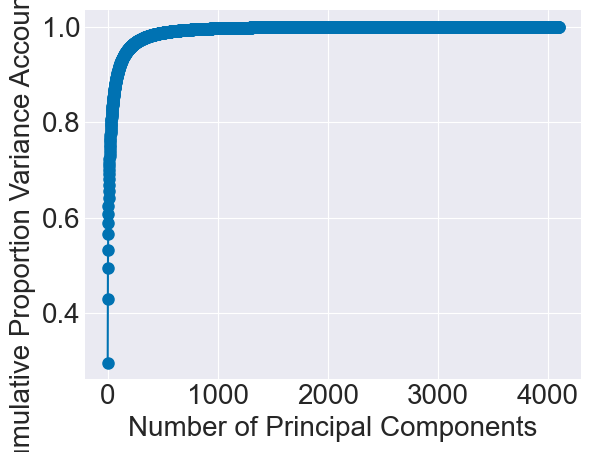

In [43]:
# Make an elbow plot of the PCA results
pca_face.elbow_plot()


Variance accounted for by each PC:
PC 1: 29.65%
PC 2: 42.93%
PC 3: 49.38%
PC 4: 53.23%
PC 5: 56.65%
PC 6: 58.82%
PC 7: 60.79%
PC 8: 62.55%
PC 9: 64.10%
PC 10: 65.57%
PC 11: 66.80%
PC 12: 68.01%
PC 13: 69.12%
PC 14: 69.98%
PC 15: 70.76%
PC 16: 71.52%
PC 17: 72.25%
PC 18: 72.93%
PC 19: 73.58%
PC 20: 74.18%
PC 21: 74.74%
PC 22: 75.27%
PC 23: 75.78%
PC 24: 76.29%
PC 25: 76.78%
PC 26: 77.24%
PC 27: 77.69%
PC 28: 78.12%
PC 29: 78.54%
PC 30: 78.94%
PC 31: 79.33%
PC 32: 79.71%
PC 33: 80.08%
PC 34: 80.43%
PC 35: 80.76%
PC 36: 81.09%
PC 37: 81.41%
PC 38: 81.71%
PC 39: 82.01%
PC 40: 82.30%
PC 41: 82.58%
PC 42: 82.84%
PC 43: 83.10%
PC 44: 83.35%
PC 45: 83.59%
PC 46: 83.83%
PC 47: 84.06%
PC 48: 84.29%
PC 49: 84.51%
PC 50: 84.72%
PC 51: 84.93%
PC 52: 85.13%
PC 53: 85.33%
PC 54: 85.52%
PC 55: 85.71%
PC 56: 85.89%
PC 57: 86.07%
PC 58: 86.25%
PC 59: 86.42%
PC 60: 86.59%
PC 61: 86.76%
PC 62: 86.92%
PC 63: 87.08%
PC 64: 87.23%
PC 65: 87.37%
PC 66: 87.52%
PC 67: 87.66%
PC 68: 87.81%
PC 69: 87.94%
PC 70: 8

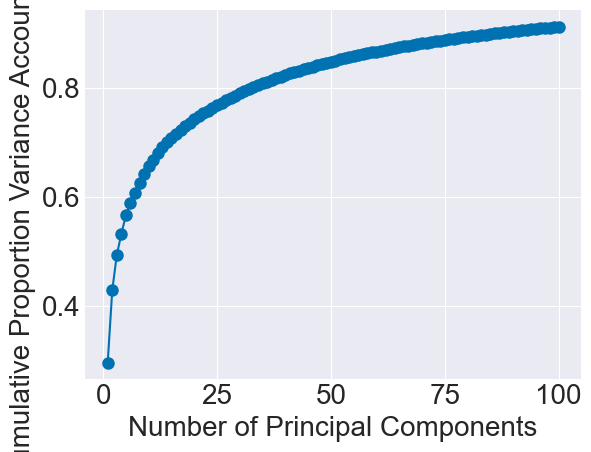

In [44]:
# You should readily notice that it is challenging to see how many PCs are required before the curve plateaus. Update your plot below with a reasonable number of PCs to show in order to focus on the curve before it plateaus.
pca_face.elbow_plot(num_pcs_to_keep=100)

### 2g) Reconstruct faces using the principal components

Use your elbow plot to find the number of top principal components required to *approximately* explain the following cumulative proportion of the variance:
- 50%
- 70%
- 80%
- 95%


- For each of the above number of PCs, project them back onto the original data space.
- Write then use the below `make_imgs` function to convert the projected data back to image shapes `(13231, 64, 64)`.
- Use `face_plot` to plot the reconstructed faces for each of the variance numbers above.

**There should be 4 5x5 plots below**

In [45]:
# this function is used to find the number of principal components to keep based on a given variance
def find_num_of_pc(pca_face, variance):
    for i in range(len(pca_face.cum_var)):
        if pca_face.cum_var[i] > variance:
                return (i+1)

# Number of principal components when 50% variance
pc50 = find_num_of_pc(pca_face, 0.5)

# Number of principal components when 70% variance
pc70 = find_num_of_pc(pca_face, 0.7)

# Number of principal components when 80% variance
pc80 = find_num_of_pc(pca_face, 0.8)

# Number of principal components when 95% variance
pc95 = find_num_of_pc(pca_face, 0.95)

print(pc50, pc70, pc80, pc95)

4 15 33 180


In [46]:
import math

def make_imgs(reconstucted_imgs, img_y = None, img_x = None):
    '''Inflates a 1D feature vector representation of images into 2D images for plotting.
    Assumes square images
    
    Parameters:
    -----------
    reconstucted_imgs: ndarray. shape=(N, img_y*img_x)
        1D vector representation of each image
    
    Returns:
    -----------
    ndarray. shape=(N, img_y, img_x)
        The images inflated into 2D
    '''
    N = reconstucted_imgs.shape[0]
    if img_y == None or img_x == None:
        imgx = int(math.sqrt(reconstucted_imgs.shape[1]))
        reconstucted_imgs = reconstucted_imgs.reshape((N, imgx, imgx))
    else:
        reconstucted_imgs = reconstucted_imgs.reshape((N, img_y, img_x))
    return reconstucted_imgs

#### 50% variance face grid

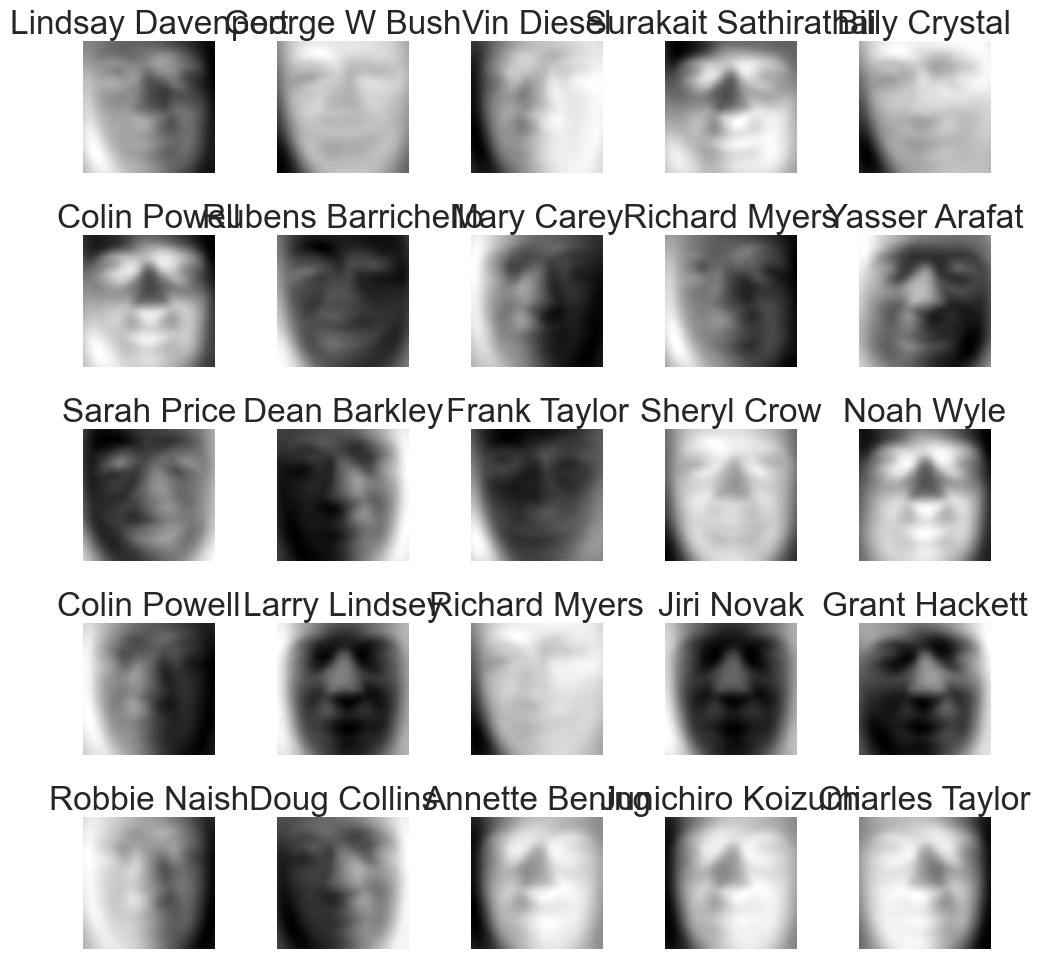

In [47]:
imgs_50 = make_imgs(pca_face.pca_then_project_back(pc50))
face_plot(imgs_50, face_names)

#### 70% variance face grid

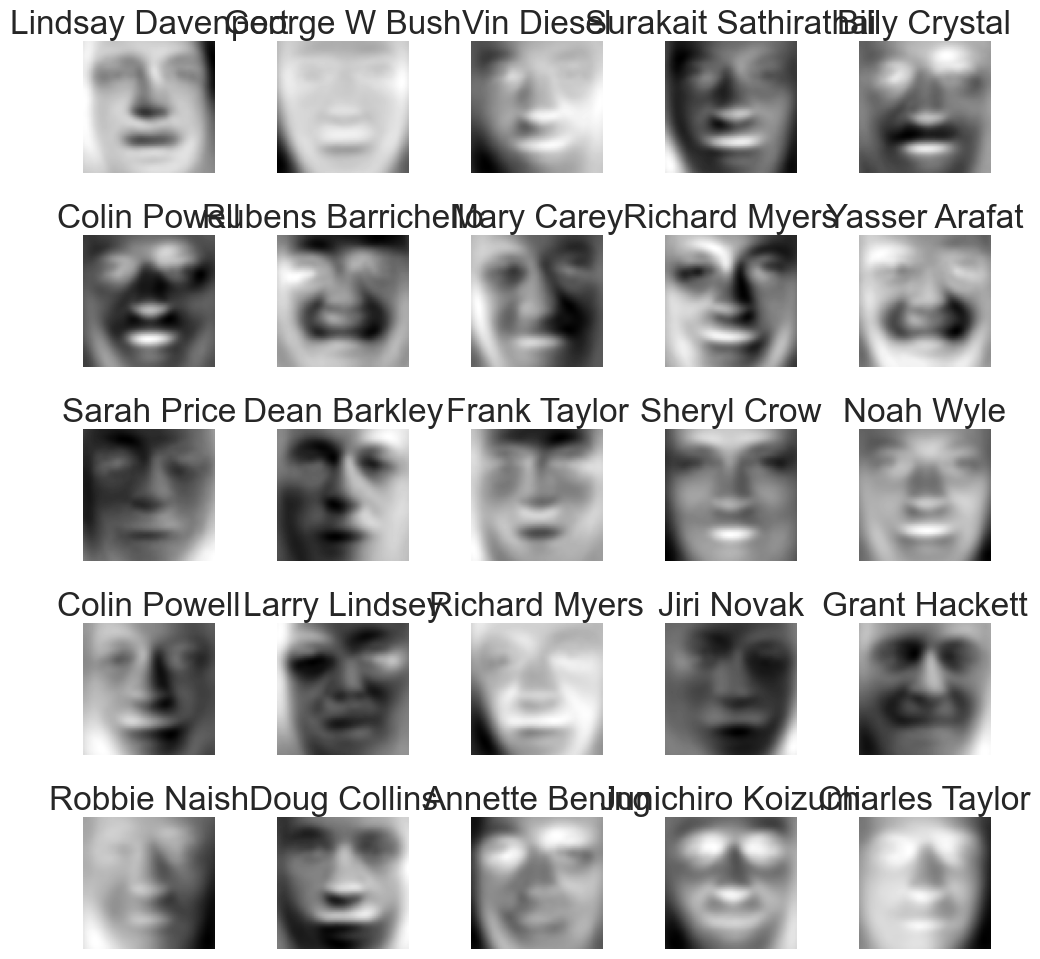

In [49]:
imgs_70 = make_imgs(pca_face.pca_then_project_back(pc70))
face_plot(imgs_70, face_names)

#### 80% variance face grid

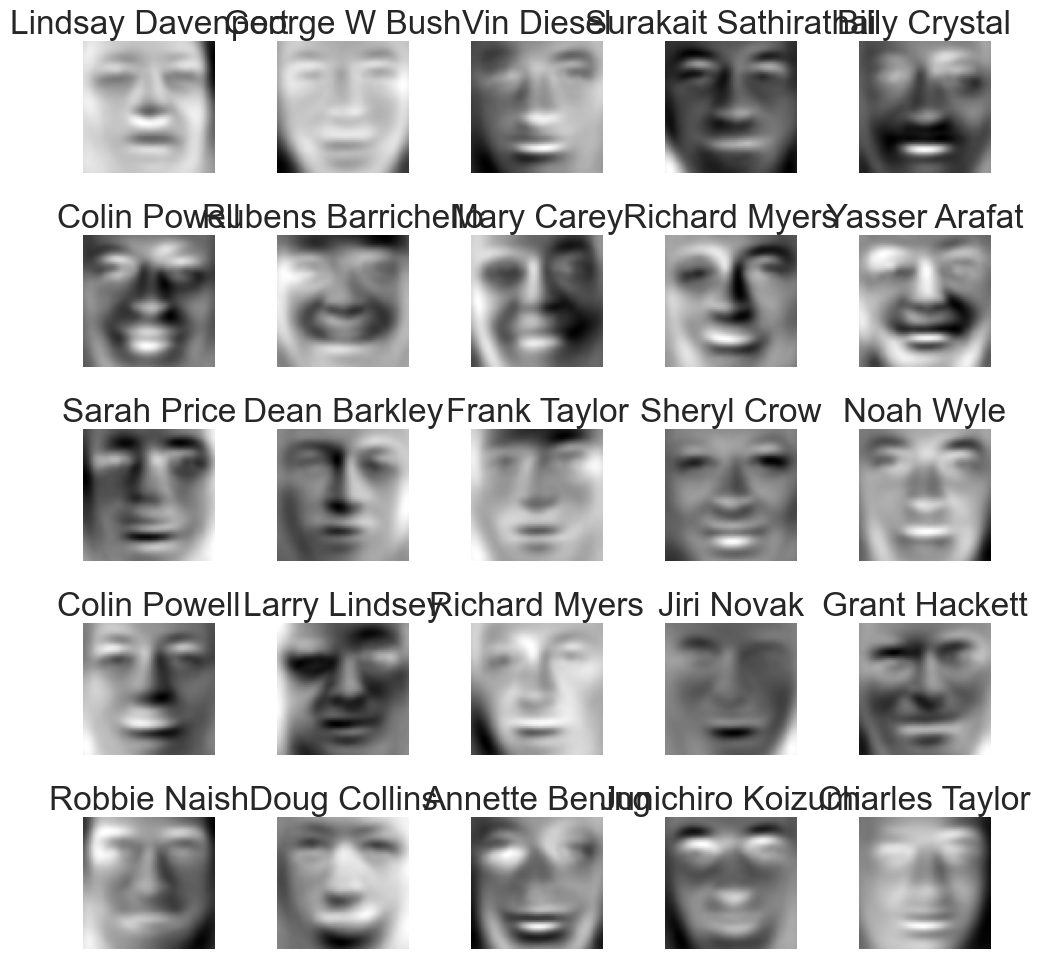

In [50]:
imgs_80 = make_imgs(pca_face.pca_then_project_back(pc80))
face_plot(imgs_80, face_names)

#### 95% variance face grid

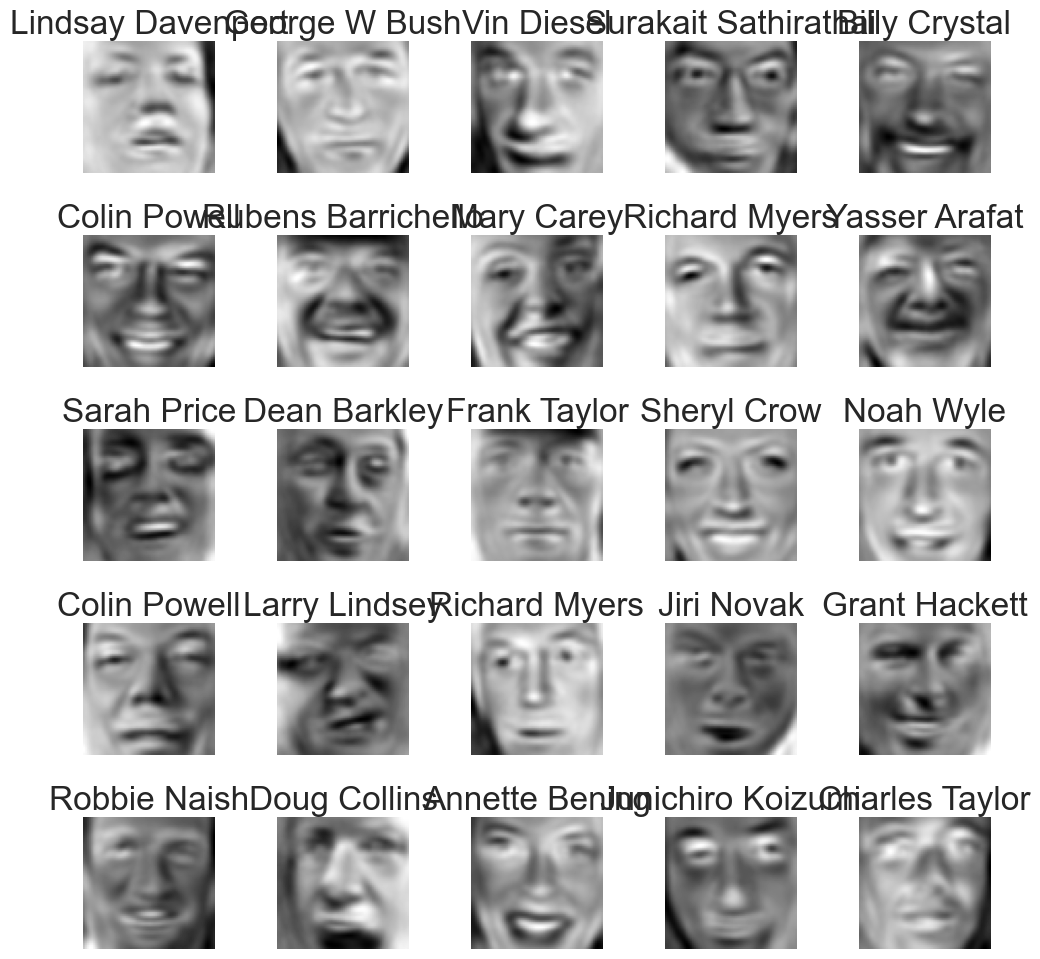

In [51]:
imgs_95 = make_imgs(pca_face.pca_then_project_back(pc95))
face_plot(imgs_95, face_names)

**Question 5:** Briefly interpret the face reconstruction with the above choices of proportion variance explained.

**Answer 5:**

The face reconstruction shows how well we can approximate the original faces using a certain number of principal components that explain a certain proportion of the variance. When we keep only 50% of the principal components, the reconstructed faces are very blurry and lack recognizable features. As we increase the number of principal components we keep, the reconstructed faces become clearer and resemble the original faces more closely. Finally, when we keep enough principal components to explain 95% of the variance, the reconstructed faces are almost identical to the original faces and are highly recognizable.




## Extensions

To receive credit for any extension, you must:
- Not modify / prevent any code from the core project from working (e.g. make a copy before changing). In other words, **the notebook test code should still work!**
- **You must describe what you did and what you found in detail**. This includes a summary of parameter values used in your simulations.
- Include (*labeled!*) plots and/or numbers to present your results.
- Write up your extensions below or in a separate notebook.

**Rule of thumb: one deep, thorough extension is worth more than several quick, shallow extensions!**

**Reminder:** Give credit to all sources, including anyone that you consulted.

**Note about CSV files:** Please try if at all possible to use pandas `read_csv` method with the URL argument in your submitted notebook extensions (should be possible if you downloaded your CSV file off the internet). This way, graders will be able to download the same data and you won't have to remember to copy over the CSV file with your project submission (this is welcome too). Remember the 10MB rule though for filer submissions.

### 1. Your own dataset

- Do PCA on a dataset of your choice. Use any of the canonical analysis tools (e.g. elbow plot, proportion variance explained, etc) to inform your analysis and exploration. 

### 2. Image compression

- Run PCA on your own images and analyze the trade-off in compression and reconstruction error.

### 3. Facial recognition with Eigenfaces

You can use Eigenfaces to perform facial recognition! Here is the idea:

1. Perform PCA on images of faces of people who you would like to be able to "learn" to recognize (creating a "database" of known faces). This is just like what you did in the main project.
2. Project a "query" image of a face that you would like to recognize into the PCA space established by the database of known faces (the number of PCA dimensions is up to you).  
3. Project each of the images in the face database into the same PCA space established by the database of known faces (the number of PCA dimensions is the same as before).
4. Treat the projected query image and each projected database images as vectors. Compute the Euclidean distance of the vector obtained by subtracting that of the query image and that of each database image.
5. Pick a match tolerance level. If any of the distances is less than your tolerance level, you have a match! If none of the distances is smaller than your tolerance, you don't have a match.